In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [2]:
treecov_data = pd.read_csv('../data_files/tree_coverage.csv')
demographic_data = pd.read_csv('../data_files/demographic_data.csv')
equity_data = pd.read_csv('../data_files/Equity.csv')

In [3]:
assert treecov_data.shape == (385231, 7)
assert demographic_data.shape == (78, 46)
assert equity_data.shape == (78, 11)

All data loaded, confirmed shape matches description

In [4]:
treecov_mod_data = treecov_data.copy()
treecov_mod_data

,OBJECTID,TREE_TYPE,AREA_SQFT,NEIGHBORHOOD,GlobalID,Shape__Area,Shape__Length
0,1,Coniferous,628.650276,Windsor,9a81d1dc-85f5-47ac-b861-3b53d75ba445,628.644531,126.105901
1,2,Unclassified,81.491726,Windsor,b7475a71-5335-4eff-b61a-7601eb6c2f2e,81.491211,51.134883
2,3,Coniferous,151.341909,Windsor,a3b49c49-fbcc-4f6b-b740-1c152b47999b,151.341797,114.697405
3,4,Unclassified,93.133293,Windsor,77fc7d67-a4a7-4e78-9385-d26782b796bc,93.134766,55.617785
4,5,Coniferous,310.444601,Windsor,79f9a933-61e0-4d9d-a5d4-8147e23bcc8a,310.446289,143.015884
...,...,...,...,...,...,...,...
385226,385227,Deciduous,296.001484,Athmar Park,0c6de484-9168-4d58-82b5-066bf296d23d,296.000000,88.000000
385227,385228,Deciduous,420.001707,Athmar Park,8a6dda40-5200-4cc0-a8ba-e39c0a10e907,420.002930,132.000768
385228,385229,Coniferous,256.001413,Athmar Park,dc57fe22-8532-47b1-be04-62081eb2ee16,255.995117,84.000256
385229,385230,Coniferous,280.002688,Athmar Park,eca9a43c-4b44-409e-9903-d3751d51124f,280.002930,88.000000


In [5]:
treecov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385231 entries, 0 to 385230
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJECTID       385231 non-null  int64  
 1   TREE_TYPE      385231 non-null  object 
 2   AREA_SQFT      385231 non-null  float64
 3   NEIGHBORHOOD   385231 non-null  object 
 4   GlobalID       385231 non-null  object 
 5   Shape__Area    385231 non-null  float64
 6   Shape__Length  385231 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.6+ MB


In [6]:
demographic_data

,OBJECTID,NBHD_NAME,NBHD_ID,DIST_NUM,Nmbr_Age25Plus_NoDiplomaOrGED,Pct_Age25Plus_NoDiplomaOrGED,Nmbr_Age25Plus_NoCollDegree,Pct_Age25Plus_NoCollDegree,Nmbr_Age25Plus_LessThanBA,Pct_Age25Plus_LessThanBA,...,Nmbr_PopUnder18InHouseholds,Nmbr_PopulationDensity,Nmbr_PopNonHispanicWhite,Pct_PopNonHispanicWhite,Nmbr_PopulationMinority,Pct_PopulationMinority,Pct_PopOver16Unemployed,GlobalID,Shape__Area,Shape__Length
0,235,Chaffee Park,11,1,480,16.580311,1566,54.093264,1680,58.031088,...,413,4457.366767,1561,44.549087,1943,55.450913,4.000000,96d2fe8e-a846-43a0-ab05-df6e00866077,2.191687e+07,23530.827558
1,236,Sunnyside,62,1,1328,15.888969,3771,45.118449,4130,49.413735,...,1684,7333.413814,4978,47.677426,5463,52.322574,4.305076,005b46dd-0579-4114-b023-aa91640fa22c,3.969435e+07,25642.476938
2,237,Highland,36,1,585,6.488465,1966,21.805679,2246,24.911269,...,1263,9756.999055,8223,73.106330,3025,26.893670,3.723444,e5ffb39e-f1b9-4719-976a-cf7707a2af48,3.214044e+07,23553.956987
3,238,Globeville,29,9,732,30.834035,1605,67.607414,1705,71.819714,...,557,1944.412380,1449,36.179775,2556,63.820225,7.300000,2de51526-42a4-43da-92b6-909ea2cce4e6,5.742578e+07,42152.117219
4,239,Jefferson Park,39,1,335,10.455680,749,23.377029,820,25.593009,...,296,7714.457022,2400,63.241107,1395,36.758893,3.900000,b31e5c61-7836-4c60-8261-529c990a4616,1.371511e+07,17949.026682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,308,Clayton,17,9,718,24.758621,1480,51.034483,1667,57.482759,...,1124,5759.789429,1431,32.236990,3008,67.763010,7.300000,4eccedc0-f93c-405e-b0a3-8d5582869797,2.148678e+07,18648.793225
74,309,Gateway - Green Valley Ranch,28,11,3916,14.423573,16966,62.489871,19505,71.841621,...,12366,5950.878685,8378,19.123924,35431,80.876076,6.153808,71552201-c991-4f1c-99e9-b44a3c4b47c8,2.052461e+08,66249.963398
75,310,Indian Creek,38,6,97,3.033146,1035,32.363977,1386,43.339587,...,656,8206.291329,2552,63.800000,1448,36.200000,2.000000,1798ec6d-d1e7-4fb9-ac59-00c33096361e,1.358957e+07,22100.422364
76,311,Five Points,26,9,804,5.002178,5630,35.027686,6371,39.637902,...,2153,11501.432449,12562,62.123535,7659,37.876465,5.961032,83ddba69-1e06-42b3-b3e4-e13047dbcd11,4.901663e+07,32937.005548


In [7]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OBJECTID                        78 non-null     int64  
 1   NBHD_NAME                       78 non-null     object 
 2   NBHD_ID                         78 non-null     int64  
 3   DIST_NUM                        78 non-null     int64  
 4   Nmbr_Age25Plus_NoDiplomaOrGED   78 non-null     int64  
 5   Pct_Age25Plus_NoDiplomaOrGED    78 non-null     float64
 6   Nmbr_Age25Plus_NoCollDegree     78 non-null     int64  
 7   Pct_Age25Plus_NoCollDegree      78 non-null     float64
 8   Nmbr_Age25Plus_LessThanBA       78 non-null     int64  
 9   Pct_Age25Plus_LessThanBA        78 non-null     float64
 10  Nmbr_PopulationUnder18          78 non-null     int64  
 11  Pct_PopulationUnder18           78 non-null     float64
 12  Nmbr_PopulationOver70           78 non

In [8]:
equity_data

,OBJECTID_1,NBHD_NAME,GLOBALID,avgsocioeconscore,avgAccessToCareScore,avgMobidityScore,mortalityscore,avgBuiltEnvScore,avgOverallEquityScore,Shape__Area,Shape__Length
0,1,Auraria,87c9a88b-4a1a-48ed-ae2d-32b24d0f2c99,5.0,3.5,3.0,5,4.5,4.2,1.799532e+07,17704.848196
1,2,Cory - Merrill,b14d96b6-ba70-4443-acdc-8728d9233d41,5.0,5.0,3.0,4,2.5,3.9,2.339166e+07,19901.615237
2,3,Belcaro,34ad8acd-5ffe-404b-a4e8-d8da5c87f55e,5.0,4.5,4.5,5,3.5,4.5,3.248074e+07,24881.039004
3,4,Washington Park,d548a714-1296-4cbe-a397-8e3ba67b1bf9,5.0,5.0,3.5,5,2.5,4.2,4.211277e+07,30834.616899
4,5,Washington Park West,abbb13fd-0259-4efa-9403-6a2389a57b67,5.0,5.0,4.0,4,3.0,4.2,2.432769e+07,22033.044996
...,...,...,...,...,...,...,...,...,...,...,...
73,74,Whittier,675668c8-9aa5-4ea7-b364-2e6d7e2c93b3,3.0,2.5,4.0,2,3.0,2.9,1.569888e+07,15874.265873
74,75,Cole,4a8113e8-ddba-475f-9789-33439fd58387,1.5,2.5,3.5,1,4.0,2.5,1.427668e+07,14883.861117
75,76,Westwood,c064a6a1-de11-4451-801c-86c3305437ee,1.0,1.5,3.0,2,2.5,2.0,4.172528e+07,26483.335907
76,77,Sunnyside,09c674f6-5efc-4d2a-addf-617012a00bae,2.0,3.0,2.5,2,2.5,2.4,3.969435e+07,25642.476938


In [9]:
equity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OBJECTID_1             78 non-null     int64  
 1   NBHD_NAME              78 non-null     object 
 2   GLOBALID               78 non-null     object 
 3   avgsocioeconscore      78 non-null     float64
 4   avgAccessToCareScore   78 non-null     float64
 5   avgMobidityScore       78 non-null     float64
 6   mortalityscore         78 non-null     int64  
 7   avgBuiltEnvScore       78 non-null     float64
 8   avgOverallEquityScore  78 non-null     float64
 9   Shape__Area            78 non-null     float64
 10  Shape__Length          78 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 6.8+ KB


Verified no null data

In [10]:
treecov_by_neighborhood = treecov_mod_data.groupby(["NEIGHBORHOOD"]).sum().drop(columns=['TREE_TYPE', 'GlobalID'])
# dropping tree type as when it sums it adds all the tree types in a really long string, 
# globalid as it's used for geographic location and not easily translatable into coordinates
treecov_by_neighborhood

,OBJECTID,AREA_SQFT,Shape__Area,Shape__Length
NEIGHBORHOOD,,,,
Athmar Park,1122116745,4.276410e+06,4.275756e+06,8.020345e+05
Auraria,389118240,6.483626e+05,6.477505e+05,1.670802e+05
Baker,659417363,2.530846e+06,2.524556e+06,4.461944e+05
Barnum,701642520,2.554890e+06,2.550222e+06,4.930486e+05
Barnum West,680143694,2.619662e+06,2.618235e+06,4.944028e+05
...,...,...,...,...
West Colfax,566581923,3.383018e+06,3.184286e+06,5.660545e+05
West Highland,866106547,5.672799e+06,5.618241e+06,9.821810e+05
Westwood,1017144926,4.163916e+06,4.143747e+06,8.495859e+05


In [11]:
mapping = {'Chaffee_Park' : 'Chaffee Park', 
           'Platte Park' : 'Platt Park', 
           'College View-South Platte' : 'College View - South Platte', 
           'Cory Merrill' : 'Cory - Merrill', 
           'Gateway / Green Valley Ranch' : 'Gateway - Green Valley Ranch', 
           'Stapleton' : 'Central Park', }

treecov_by_neighborhoodfix = treecov_by_neighborhood.rename(index=mapping)
treecov_by_neighborhoodfix = treecov_by_neighborhoodfix.reset_index()
treecov_by_neighborhoodfix = treecov_by_neighborhoodfix.sort_values('NEIGHBORHOOD')
treecov_by_neighborhoodfix

,NEIGHBORHOOD,OBJECTID,AREA_SQFT,Shape__Area,Shape__Length
0,Athmar Park,1122116745,4.276410e+06,4.275756e+06,8.020345e+05
1,Auraria,389118240,6.483626e+05,6.477505e+05,1.670802e+05
2,Baker,659417363,2.530846e+06,2.524556e+06,4.461944e+05
3,Barnum,701642520,2.554890e+06,2.550222e+06,4.930486e+05
4,Barnum West,680143694,2.619662e+06,2.618235e+06,4.944028e+05
...,...,...,...,...,...
73,West Colfax,566581923,3.383018e+06,3.184286e+06,5.660545e+05
74,West Highland,866106547,5.672799e+06,5.618241e+06,9.821810e+05
75,Westwood,1017144926,4.163916e+06,4.143747e+06,8.495859e+05
76,Whittier,463136604,2.388399e+06,2.388389e+06,4.263257e+05


In [12]:
tree_demo_merge = treecov_by_neighborhoodfix.merge(demographic_data, how='inner', left_on='NEIGHBORHOOD', 
                                         right_on='NBHD_NAME', validate='one_to_one', suffixes=('_left', '_right'),
                                         indicator=True, ).drop(columns=['NBHD_NAME'])
tree_demo_merge

,NEIGHBORHOOD,OBJECTID_left,AREA_SQFT,Shape__Area_left,Shape__Length_left,OBJECTID_right,NBHD_ID,DIST_NUM,Nmbr_Age25Plus_NoDiplomaOrGED,Pct_Age25Plus_NoDiplomaOrGED,...,Nmbr_PopulationDensity,Nmbr_PopNonHispanicWhite,Pct_PopNonHispanicWhite,Nmbr_PopulationMinority,Pct_PopulationMinority,Pct_PopOver16Unemployed,GlobalID,Shape__Area_right,Shape__Length_right,_merge
0,Athmar Park,1122116745,4.276410e+06,4.275756e+06,8.020345e+05,242,1,7,1499,24.169623,...,5727.514827,2815,31.800723,6037,68.199277,7.345575,a3a6da3f-a202-43cc-9325-a46ee5a57698,4.308915e+07,27352.286406,both
1,Auraria,389118240,6.483626e+05,6.477505e+05,1.670802e+05,260,2,9,0,0.000000,...,1110.842209,481,67.085077,236,32.914923,0.000000,a8077236-34f6-40b3-985c-74b8096c3b00,1.799532e+07,17704.848196,both
2,Baker,659417363,2.530846e+06,2.524556e+06,4.461944e+05,268,3,7,324,6.148008,...,4316.382989,4421,68.670395,2017,31.329605,1.792299,1128f97f-419b-4e1a-8505-ae2b140194f6,4.158376e+07,32991.543473,both
3,Barnum,701642520,2.554890e+06,2.550222e+06,4.930486e+05,305,4,3,1162,30.119233,...,7655.764304,1280,21.672875,4626,78.327125,5.700000,41d8aeb7-223b-42eb-9832-b3f728a83f37,2.150788e+07,18715.219932,both
4,Barnum West,680143694,2.619662e+06,2.618235e+06,4.944028e+05,306,5,3,1118,29.655172,...,7297.712595,1278,24.195381,4004,75.804619,4.000000,f919f9f1-51d7-440a-9e2f-5830259fa937,2.017922e+07,18309.074065,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,West Colfax,566581923,3.383018e+06,3.184286e+06,5.660545e+05,293,74,1,597,7.201448,...,10347.465309,5754,55.401502,4632,44.598498,4.116648,896bda5f-f0ee-4b77-a484-b47c1e0c44a1,2.798383e+07,24946.764545,both
74,West Highland,866106547,5.672799e+06,5.618241e+06,9.821810e+05,294,75,1,88,1.125176,...,8646.846254,8062,83.053467,1645,16.946533,2.960336,5f470ff9-235e-456c-bd68-bde78cf08c3c,3.129825e+07,23646.855937,both
75,Westwood,1017144926,4.163916e+06,4.143747e+06,8.495859e+05,258,76,3,3771,38.330962,...,11874.226953,2240,12.604806,15531,87.395194,3.251732,b641684c-3c30-4eb8-a5bb-89842d9c9204,4.172528e+07,26483.335907,both
76,Whittier,463136604,2.388399e+06,2.388389e+06,4.263257e+05,300,77,9,228,6.426156,...,8511.997536,2685,56.019195,2108,43.980805,2.300000,50417586-9ab6-49c1-afd2-08f8da2ee92d,1.569888e+07,15874.265873,both


successfully merged tree data and demographic data, equity data should be relatively easy to add as well

In [20]:
equity_data.loc[equity_data['NBHD_NAME'].eq('Stapleton'), 'NBHD_NAME'] = 'Central Park'

In [58]:
all_data_merged = tree_demo_merge.merge(equity_data, how='inner', left_on='NEIGHBORHOOD', 
                                         right_on='NBHD_NAME', validate='one_to_one', suffixes=('_left', '_right'),
                                        ).drop(columns=['NBHD_NAME'])
all_data_merged = all_data_merged.rename(columns = {'Shape__Area_left' : 'Tree_coverage_area'})
all_data_merged

,NEIGHBORHOOD,OBJECTID_left,AREA_SQFT,Tree_coverage_area,Shape__Length_left,OBJECTID_right,NBHD_ID,DIST_NUM,Nmbr_Age25Plus_NoDiplomaOrGED,Pct_Age25Plus_NoDiplomaOrGED,...,OBJECTID_1,GLOBALID,avgsocioeconscore,avgAccessToCareScore,avgMobidityScore,mortalityscore,avgBuiltEnvScore,avgOverallEquityScore,Shape__Area,Shape__Length
0,Athmar Park,1122116745,4.276410e+06,4.275756e+06,8.020345e+05,242,1,7,1499,24.169623,...,23,cf82ba85-16dc-4d4d-aa30-f237400ccfa6,1.0,2.0,3.0,3,2.5,2.3,4.308915e+07,27352.286406
1,Auraria,389118240,6.483626e+05,6.477505e+05,1.670802e+05,260,2,9,0,0.000000,...,1,87c9a88b-4a1a-48ed-ae2d-32b24d0f2c99,5.0,3.5,3.0,5,4.5,4.2,1.799532e+07,17704.848196
2,Baker,659417363,2.530846e+06,2.524556e+06,4.461944e+05,268,3,7,324,6.148008,...,70,3437d946-55d5-4ed3-99da-701c675f5e2e,3.0,4.0,2.5,2,4.0,3.1,4.158376e+07,32991.543473
3,Barnum,701642520,2.554890e+06,2.550222e+06,4.930486e+05,305,4,3,1162,30.119233,...,14,ae55c467-f15e-478c-b789-4f79e22e4020,1.0,2.0,3.0,2,2.0,2.0,2.150788e+07,18715.219932
4,Barnum West,680143694,2.619662e+06,2.618235e+06,4.944028e+05,306,5,3,1118,29.655172,...,15,e39afff3-c27d-40b5-ab76-2fececa61f11,1.5,1.5,2.5,3,1.0,1.9,2.017922e+07,18309.074065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,West Colfax,566581923,3.383018e+06,3.184286e+06,5.660545e+05,293,74,1,597,7.201448,...,16,5fb1c9c3-0ec4-4025-a569-c2ced64a61bd,1.5,2.0,1.5,1,3.0,1.8,2.804979e+07,24602.836793
74,West Highland,866106547,5.672799e+06,5.618241e+06,9.821810e+05,294,75,1,88,1.125176,...,17,404d895f-3820-4d71-90f9-e602a6d06c7e,4.0,4.5,3.5,4,3.0,3.8,3.129825e+07,23646.855937
75,Westwood,1017144926,4.163916e+06,4.143747e+06,8.495859e+05,258,76,3,3771,38.330962,...,76,c064a6a1-de11-4451-801c-86c3305437ee,1.0,1.5,3.0,2,2.5,2.0,4.172528e+07,26483.335907
76,Whittier,463136604,2.388399e+06,2.388389e+06,4.263257e+05,300,77,9,228,6.426156,...,74,675668c8-9aa5-4ea7-b364-2e6d7e2c93b3,3.0,2.5,4.0,2,3.0,2.9,1.569888e+07,15874.265873


Now that all of our data is in one dataframe, we can start to examine our data in relation to our target variable of tree coverage further.

In [71]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=1)

    sns.histplot(
        data[label], 
        stat = 'density',
        bins = 15, 
        kde = 'true',   
    )

    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs.set_xlim((xmin, xmax))

    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

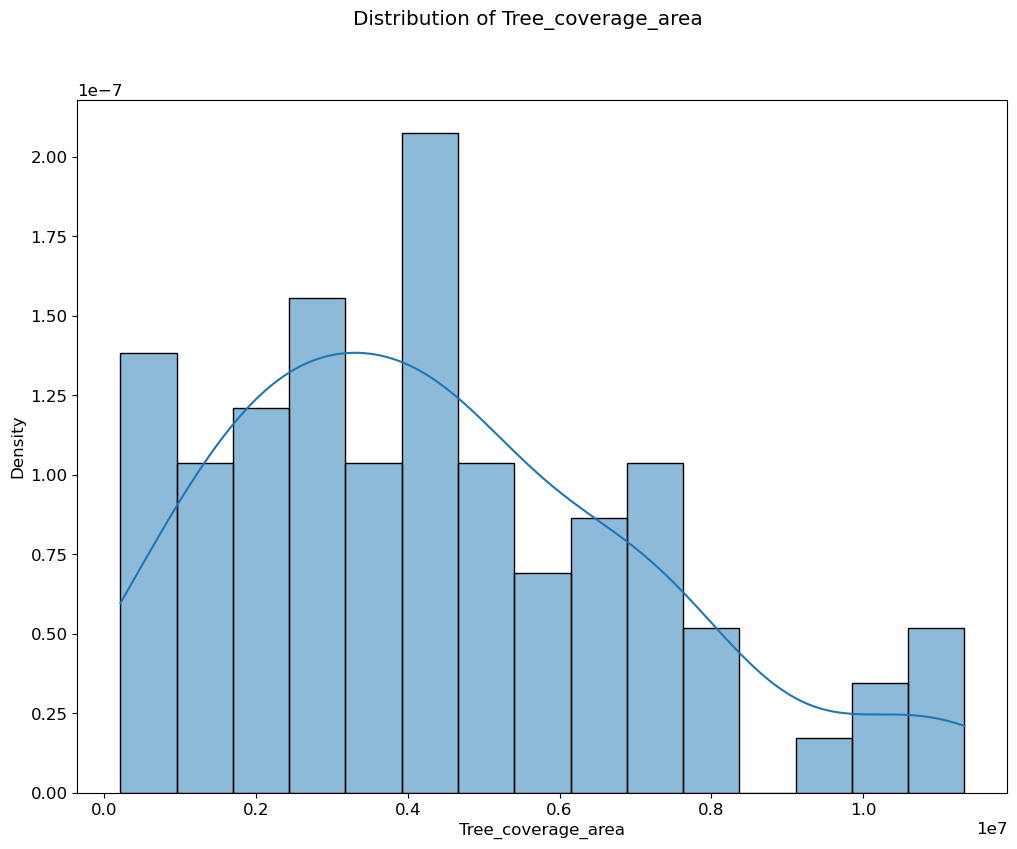

In [72]:
plot_distribution(all_data_merged, label='Tree_coverage_area')